In [161]:
import warnings
import pathlib
import os
import sys

import pandas as pd


warnings.filterwarnings("ignore")

In [46]:
project_folder = pathlib.Path(os.path.abspath("__file__")).resolve().parent.parent
sys.path.insert(1, str(project_folder))

from classes.yahoo_parser import SP500Parser

In [57]:
yahoo_parser = SP500Parser()


start = '2023-01-01'
end = '2024-01-14'
data = yahoo_parser.download_sp500_data(start, end)

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2024-01-14)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [49]:
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

data_assets = data[data['Symbol'].isin(assets)]
data_assets

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-01-03,APA,4361.9999%,4361.9999%,4634.9998%,4302.0000%,4588.9999%,616900000.0000%
2023-01-04,APA,4215.0002%,4215.0002%,4331.0001%,4184.0000%,4241.0000%,903450000.0000%
2023-01-05,APA,4175.9998%,4175.9998%,4241.0000%,4136.0001%,4188.9999%,701900000.0000%
2023-01-06,APA,4288.9999%,4288.9999%,4332.0000%,4193.9999%,4254.0001%,576340000.0000%
2023-01-09,APA,4336.9999%,4336.9999%,4445.0001%,4329.9999%,4406.0001%,573700000.0000%
...,...,...,...,...,...,...,...
2024-01-08,ZION,4454.0001%,4454.0001%,4459.0000%,4340.0002%,4377.9999%,180500000.0000%
2024-01-09,ZION,4404.0001%,4404.0001%,4459.0000%,4338.0001%,4384.0000%,138820000.0000%
2024-01-10,ZION,4393.0000%,4393.0000%,4411.9999%,4334.0000%,4391.0000%,145460000.0000%


In [58]:
data = data.loc[:, ['Symbol', 'Adj Close']].pivot(columns="Symbol", values="Adj Close")

In [66]:
df = data.pct_change().dropna()

In [60]:
hard_coded_portfolio = {
    'AAPL': 0.07,
    'MSFT': 0.065,
    'AMZN': 0.032,
    'NVDA': 0.028,
    'GOOGL': 0.021,
    'TSLA': 0.019,
    'GOOG': 0.018,
    'BRK.B': 0.018,
    'META': 0.018,
    'UNH': 0.013,
    'XOM': 0.013,
    'LLY': 0.012,
    'JPM': 0.012,
    'JNJ': 0.011,
    'V': 0.011,
    'PG': 0.01,
    'MA': 0.009,
    'AVGO': 0.009,
    'HD': 0.009,
    'CVX': 0.008,
    'MRK': 0.007,
    'ABBV': 0.007,
    'COST': 0.007,
    'PEP': 0.007,
    'ADBE': 0.007
}

In [92]:
import random


# Calculate the remaining percentage to reach a total of 1
remaining_percentage = 1 - sum(hard_coded_portfolio.values())

# Generate random weights for the remaining stocks
random_weights = {stock: random.uniform(0, remaining_percentage) for stock in hard_coded_portfolio.keys()}

# Update the original portfolio with the random weights
for stock in hard_coded_portfolio:
    hard_coded_portfolio[stock] += random_weights[stock]

# Normalize the weights to ensure the total sum is 1
total_sum = sum(hard_coded_portfolio.values())
hard_coded_portfolio = {stock: weight / total_sum for stock, weight in hard_coded_portfolio.items()}

# Display the updated portfolio
hard_coded_portfolio


{'AAPL': 0.08068678813738168,
 'MSFT': 0.0379449369419431,
 'AMZN': 0.07041025034385734,
 'NVDA': 0.019325376358977273,
 'GOOGL': 0.011028975245272929,
 'TSLA': 0.030385003877385772,
 'GOOG': 0.06435283365905202,
 'BRK.B': 0.06679340309729137,
 'META': 0.030413468563706487,
 'UNH': 0.03786623090626638,
 'XOM': 0.0458501399547764,
 'LLY': 0.027313012481718763,
 'JPM': 0.007160781654220423,
 'JNJ': 0.04789382906598987,
 'V': 0.06588055502119301,
 'PG': 0.022307037545655817,
 'MA': 0.005441300693776723,
 'AVGO': 0.03156514174952248,
 'HD': 0.018272996668443824,
 'CVX': 0.050531426262367306,
 'MRK': 0.04474674784572373,
 'ABBV': 0.025167076049402097,
 'COST': 0.051639355628391344,
 'PEP': 0.07305777519017828,
 'ADBE': 0.033965557057505695}

In [93]:
tickers = list(hard_coded_portfolio.keys())

In [101]:
portfolio_change = df.loc[:, df.columns.isin(tickers)]
portfolio_change

Symbol,AAPL,ABBV,ADBE,AMZN,AVGO,COST,CVX,GOOG,GOOGL,HD,...,META,MRK,MSFT,NVDA,PEP,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-05,0.7198%,-0.1625%,-0.3819%,-0.8189%,0.0061%,-0.3987%,0.5275%,-0.2055%,-0.1257%,-0.2360%,...,-0.2585%,1.3996%,0.1254%,1.4691%,-5.2158%,-1.4866%,-0.4250%,1.0987%,0.9774%,-2.2511%
2023-10-06,1.4750%,0.5358%,1.9828%,1.5878%,2.5975%,-2.1053%,-1.0189%,2.0148%,1.8583%,0.3840%,...,3.4909%,0.2703%,2.4737%,2.4033%,0.1187%,0.2017%,0.1846%,1.6621%,0.6682%,-1.6699%
2023-10-09,0.8451%,0.5869%,0.4956%,0.2344%,1.2564%,0.2583%,2.7677%,0.5550%,0.6106%,0.8674%,...,0.9289%,0.5968%,0.7823%,-1.0686%,0.6675%,-0.5066%,-0.3301%,0.3239%,-0.2553%,3.4991%
2023-10-10,-0.3352%,-0.1475%,0.6480%,0.9512%,0.2956%,0.5582%,-0.1080%,-0.2151%,-0.2601%,1.3069%,...,1.0931%,-0.8517%,-0.4336%,1.1596%,1.8840%,0.9905%,1.5212%,-0.4311%,0.9213%,-0.4237%
2023-10-11,0.7904%,0.3022%,3.2268%,1.8150%,1.8814%,0.6102%,-3.2665%,1.7960%,1.8036%,-0.3910%,...,1.8581%,-0.1448%,1.2272%,2.2010%,-1.0827%,-1.2295%,-0.2390%,-0.0210%,-0.3888%,-3.5853%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,2.4175%,-0.4379%,2.8250%,2.6577%,2.4369%,0.8658%,-0.5984%,2.2855%,2.2913%,1.4551%,...,1.9065%,0.1365%,1.8872%,6.4281%,0.1006%,0.8615%,1.2464%,-0.1600%,1.0975%,-1.6662%
2024-01-09,-0.2263%,0.5451%,0.9732%,1.5225%,0.7108%,0.8297%,-2.5418%,1.4445%,1.5197%,-0.5001%,...,-0.3429%,0.8945%,0.2936%,1.6975%,-1.1472%,0.4102%,-2.2832%,0.3448%,0.3009%,-1.2386%
2024-01-10,0.5671%,1.5896%,0.8240%,1.5591%,-0.1774%,0.8364%,-0.8236%,0.8698%,0.9436%,3.0648%,...,3.6483%,0.3631%,1.8574%,2.2770%,-0.1495%,0.4287%,-0.4341%,-0.1356%,0.4671%,-0.9832%


In [97]:
import riskfolio as rp

In [102]:
port = rp.Portfolio(returns=portfolio_change)


method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,ABBV,ADBE,AMZN,AVGO,COST,CVX,GOOG,GOOGL,HD,...,META,MRK,MSFT,NVDA,PEP,PG,TSLA,UNH,V,XOM
weights,0.0000%,0.0000%,0.0000%,6.9854%,8.2217%,4.5439%,0.0000%,0.0000%,0.0000%,0.7621%,...,0.0000%,32.3262%,21.3148%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


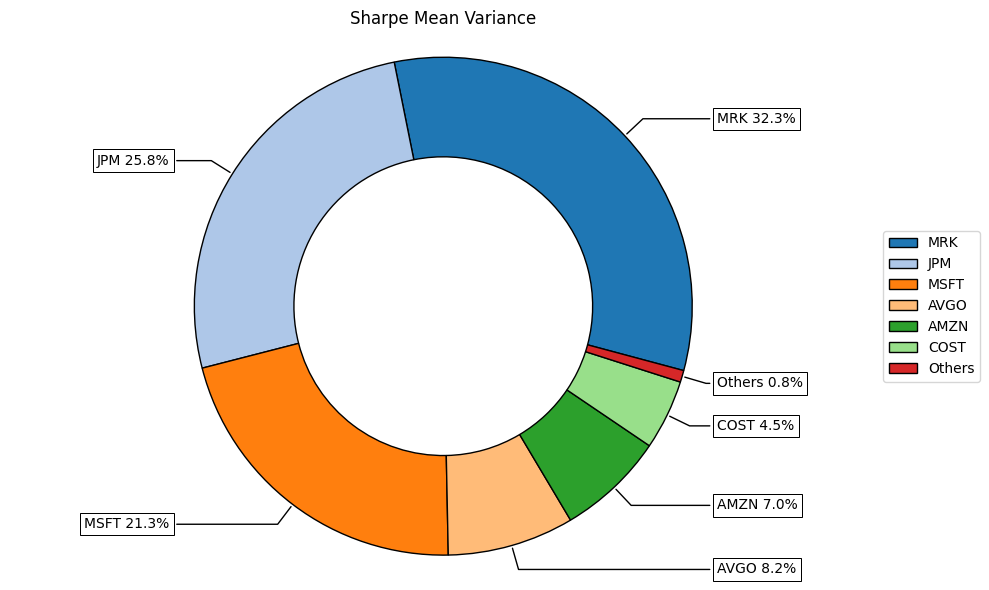

In [103]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [104]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,ABBV,ADBE,AMZN,AVGO,COST,CVX,GOOG,GOOGL,HD,...,META,MRK,MSFT,NVDA,PEP,PG,TSLA,UNH,V,XOM
0,20.8075%,0.0000%,0.0000%,2.3525%,0.0000%,4.2880%,0.0000%,0.0000%,2.1621%,0.0000%,...,1.9331%,24.4916%,4.7258%,0.0000%,0.0000%,11.8852%,0.0000%,7.7128%,0.0000%,12.8660%
1,6.4512%,0.0000%,0.0000%,6.9826%,2.4201%,4.2256%,0.0000%,0.0000%,0.0000%,0.0000%,...,1.0719%,28.1321%,13.3542%,0.0000%,0.0000%,8.2673%,0.0000%,1.6752%,2.3652%,5.6495%
2,0.0000%,0.0000%,0.0000%,8.3848%,3.8311%,4.3241%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.3996%,29.6163%,17.1507%,0.0000%,0.0000%,5.8097%,0.0000%,0.0000%,3.7810%,2.2645%
3,0.0000%,0.0000%,0.0000%,7.8126%,5.9020%,5.3571%,0.0000%,0.0000%,0.0000%,0.0001%,...,0.0001%,32.0100%,20.1000%,0.0000%,0.0000%,0.9221%,0.0000%,0.0000%,0.5974%,0.0000%
4,0.0000%,0.0000%,0.0000%,5.7792%,11.6353%,2.9353%,0.0000%,0.0000%,0.0000%,1.9428%,...,0.0000%,32.2003%,22.4745%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


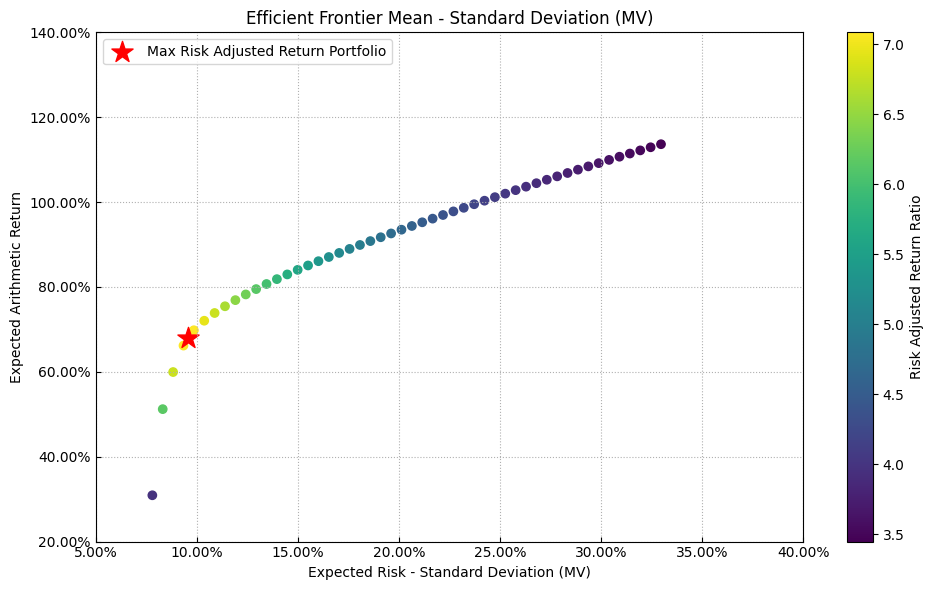

In [105]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

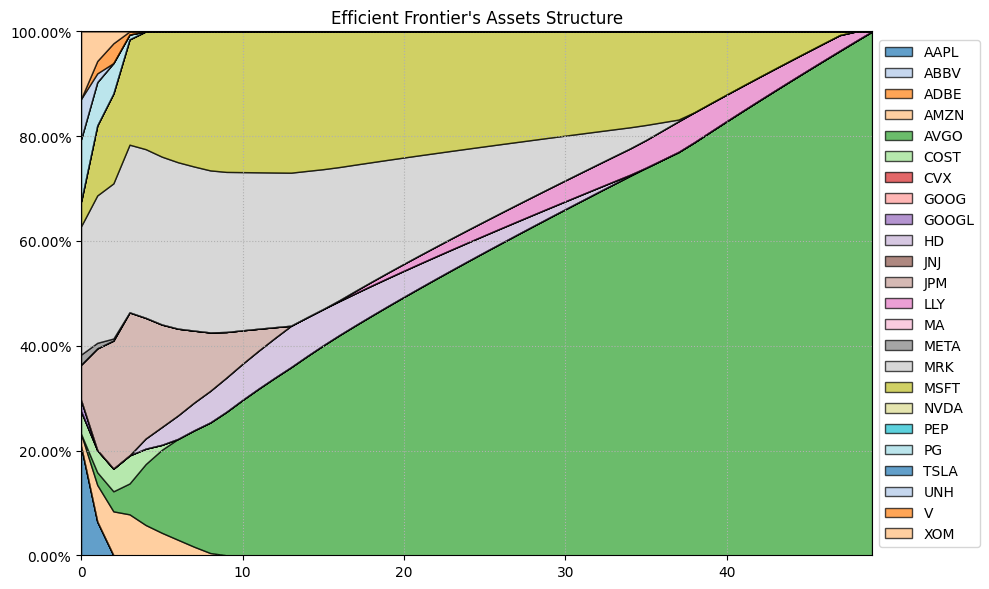

In [106]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [107]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,ABBV,ADBE,AMZN,AVGO,COST,CVX,GOOG,GOOGL,HD,...,META,MRK,MSFT,NVDA,PEP,PG,TSLA,UNH,V,XOM
weights,0.0000%,0.0000%,0.0000%,4.9855%,25.5343%,0.0000%,0.0000%,0.0000%,0.0000%,2.7930%,...,0.0000%,17.1301%,14.6089%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


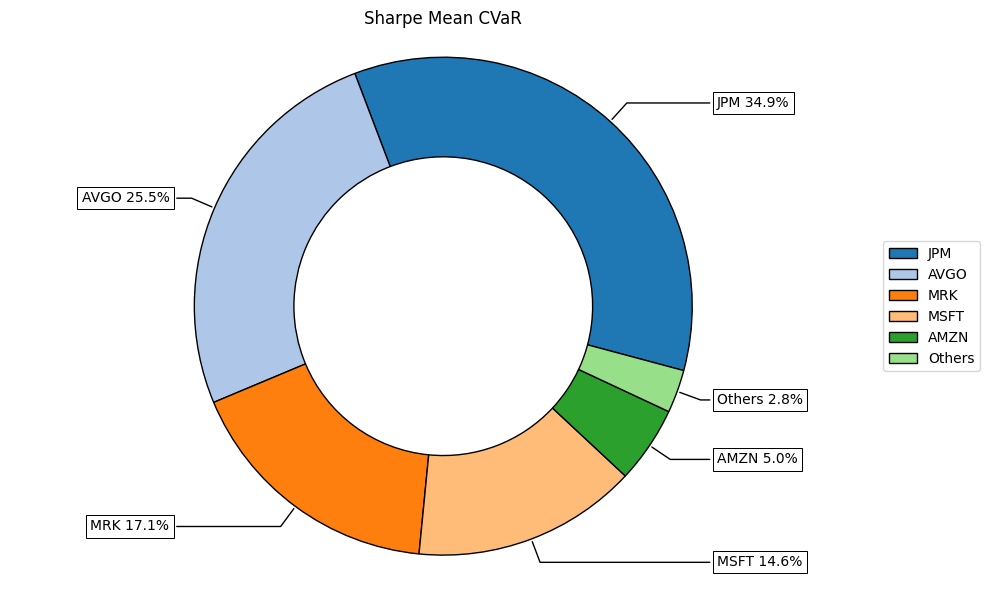

In [108]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [109]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,ABBV,ADBE,AMZN,AVGO,COST,CVX,GOOG,GOOGL,HD,...,META,MRK,MSFT,NVDA,PEP,PG,TSLA,UNH,V,XOM
0,10.4093%,0.0000%,0.0000%,9.7363%,0.0000%,0.0000%,4.6581%,0.0000%,4.1250%,3.8532%,...,0.0000%,20.1384%,3.9667%,0.0000%,0.0000%,4.0335%,0.0000%,25.6375%,0.0000%,13.4420%
1,0.0000%,0.0000%,0.0000%,12.3305%,0.8128%,0.0000%,0.0000%,0.0000%,0.0000%,5.5003%,...,5.4096%,15.6898%,12.4613%,0.0000%,0.0000%,21.0661%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,11.3384%,5.6436%,0.0000%,0.0000%,0.0000%,0.0000%,6.2689%,...,2.7836%,15.8678%,13.4718%,0.0000%,0.0000%,17.1487%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,10.3464%,10.4745%,0.0000%,0.0000%,0.0000%,0.0000%,7.0374%,...,0.1575%,16.0458%,14.4822%,0.0000%,0.0000%,13.2313%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%,8.9154%,14.5852%,0.0000%,0.0000%,0.0000%,0.0000%,5.9736%,...,0.0000%,16.3342%,14.5599%,0.0000%,0.0000%,9.6343%,0.0000%,0.0000%,0.0000%,0.0000%


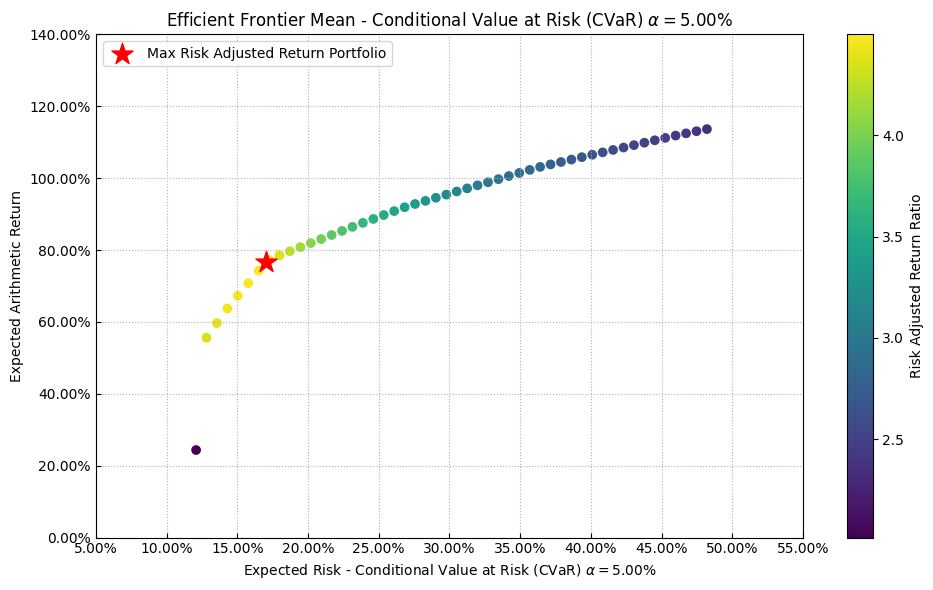

In [110]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

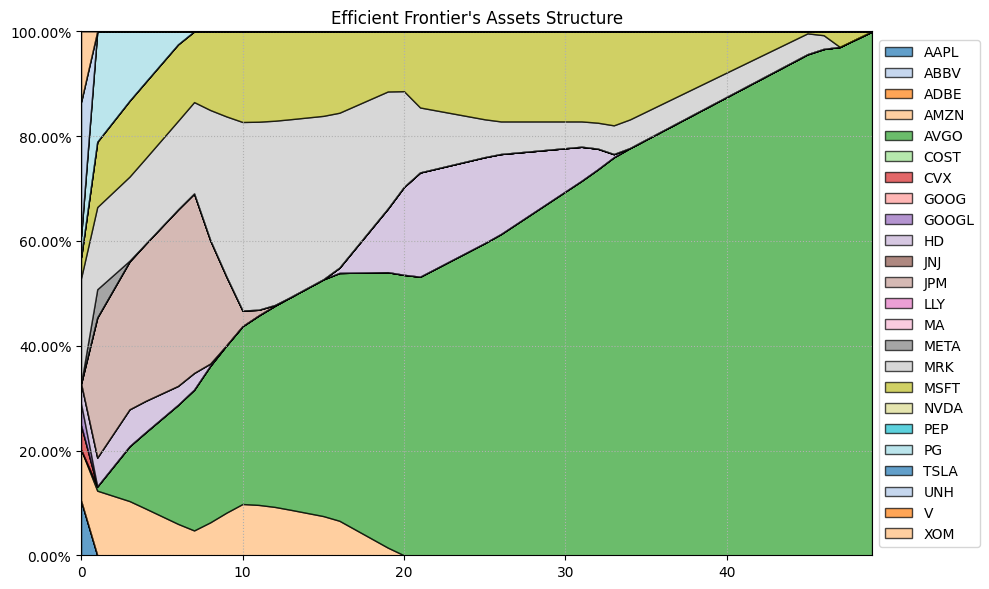

In [111]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [112]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

<Axes: >

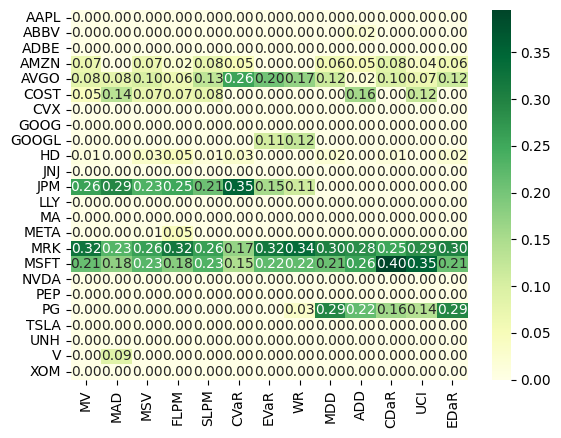

In [124]:
import seaborn as sns
sns.heatmap(w_s, annot=True, fmt=".2f", cmap='YlGn')

<Axes: >

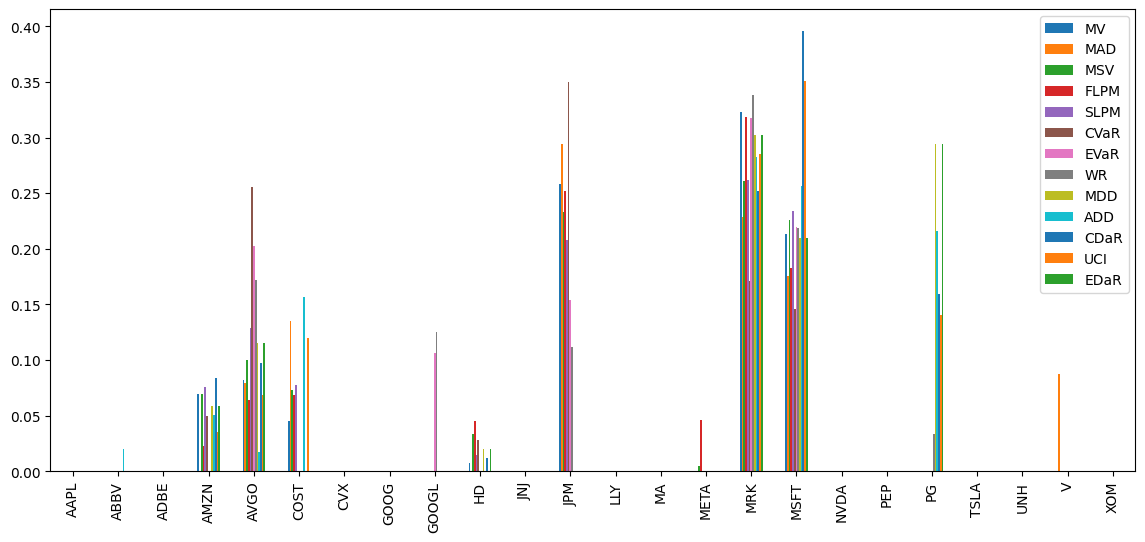

In [125]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)


In [132]:
w_s['MV']

AAPL     0.0000%
ABBV     0.0000%
ADBE     0.0000%
AMZN     6.9854%
AVGO     8.2217%
COST     4.5439%
CVX      0.0000%
GOOG     0.0000%
GOOGL    0.0000%
HD       0.7621%
JNJ      0.0000%
JPM     25.8459%
LLY      0.0000%
MA       0.0000%
META     0.0000%
MRK     32.3262%
MSFT    21.3148%
NVDA     0.0000%
PEP      0.0000%
PG       0.0000%
TSLA     0.0000%
UNH      0.0000%
V        0.0000%
XOM      0.0000%
Name: MV, dtype: float64

In [160]:
w.to_dict()['weights']

{'AAPL': 6.8548794556969265e-09,
 'ABBV': 2.3434644225069882e-08,
 'ADBE': 6.644462524274795e-09,
 'AMZN': 0.059049897789854616,
 'AVGO': 0.11530355661281612,
 'COST': 1.8877324777697906e-08,
 'CVX': 6.298310486256657e-09,
 'GOOG': 5.3560973437793906e-09,
 'GOOGL': 5.4517144157719484e-09,
 'HD': 0.01988558075053516,
 'JNJ': 4.7492123238218255e-09,
 'JPM': 1.8147182929950894e-08,
 'LLY': 3.4459619406625534e-09,
 'MA': 3.2063128418786857e-09,
 'META': 1.7998404322382635e-08,
 'MRK': 0.30202028795491587,
 'MSFT': 0.20965971047501453,
 'NVDA': 2.4189557802221037e-09,
 'PEP': 7.896513917597091e-09,
 'PG': 0.29408079649436464,
 'TSLA': 9.78998443404127e-10,
 'UNH': 5.952187254956744e-09,
 'V': 7.805182406651516e-09,
 'XOM': 2.4406153760796277e-08}

In [144]:
hard_coded_portfolio

{'AAPL': 0.08068678813738168,
 'MSFT': 0.0379449369419431,
 'AMZN': 0.07041025034385734,
 'NVDA': 0.019325376358977273,
 'GOOGL': 0.011028975245272929,
 'TSLA': 0.030385003877385772,
 'GOOG': 0.06435283365905202,
 'BRK.B': 0.06679340309729137,
 'META': 0.030413468563706487,
 'UNH': 0.03786623090626638,
 'XOM': 0.0458501399547764,
 'LLY': 0.027313012481718763,
 'JPM': 0.007160781654220423,
 'JNJ': 0.04789382906598987,
 'V': 0.06588055502119301,
 'PG': 0.022307037545655817,
 'MA': 0.005441300693776723,
 'AVGO': 0.03156514174952248,
 'HD': 0.018272996668443824,
 'CVX': 0.050531426262367306,
 'MRK': 0.04474674784572373,
 'ABBV': 0.025167076049402097,
 'COST': 0.051639355628391344,
 'PEP': 0.07305777519017828,
 'ADBE': 0.033965557057505695}